In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn.decomposition import PCA 

## Problem Statement

This model will aim to predict breast cancer type as either malignant or benign based on the best features(independent variables).  Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


In [2]:
cancer=pd.read_csv(r"D:\Data\data.csv")

In [3]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancer.shape

(569, 33)

In [6]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## Missing Value Check

In [7]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df=pd.DataFrame()
df['coun']=cancer.isnull().sum()
df['perc']=cancer.isnull().sum()/len(cancer)*100
df

,coun,perc
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


In [9]:
cancer.drop(columns=["Unnamed: 32","id"],inplace=True)

In [10]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
cancer.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [12]:
cancer["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
357/569

0.6274165202108963

In [14]:
col = cancer.columns

### Outlier Detection for radius_mean

In [15]:
#print("Highest allowed",cancer['radius_mean'].mean() + 3*cancer['radius_mean'].std())
#print("Lowest allowed",cancer['radius_mean'].mean() - 3*cancer['radius_mean'].std())

In [16]:
cancer1=cancer.select_dtypes(include=['float64'])

C:\Users\22000370\AppData\Local\Temp/ipykernel_20580/306421584.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,1))


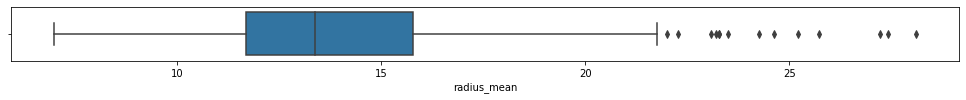

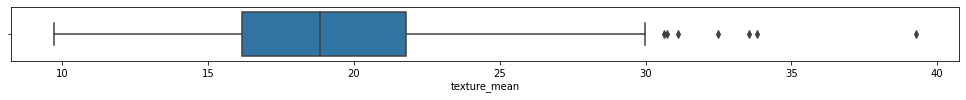

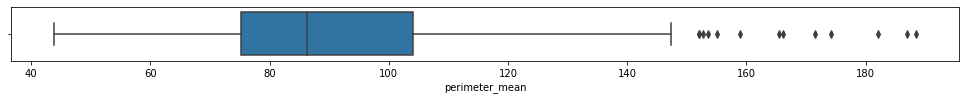

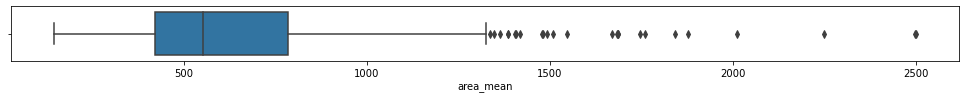

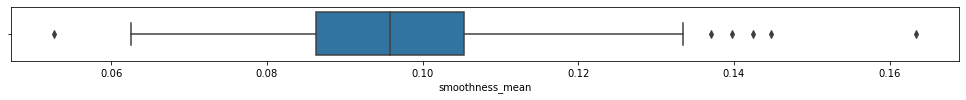

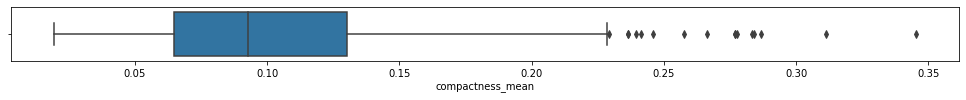

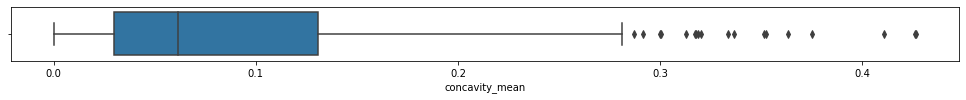

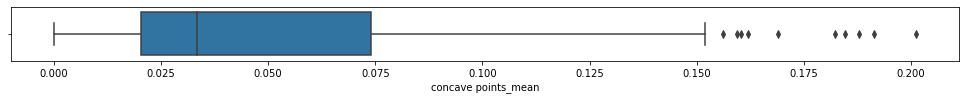

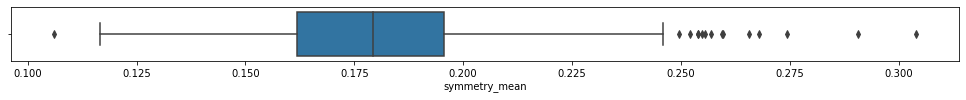

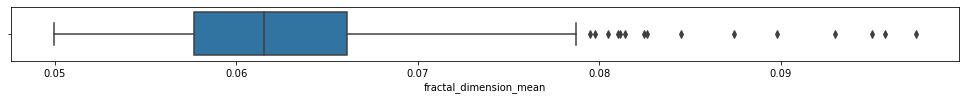

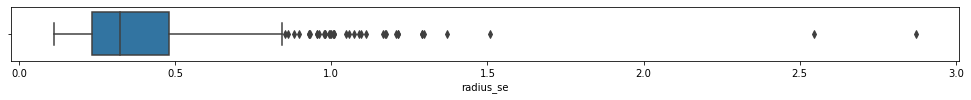

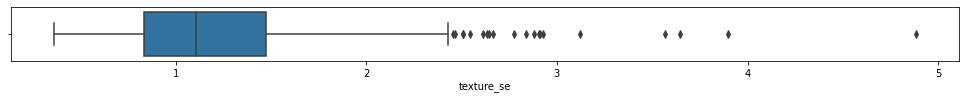

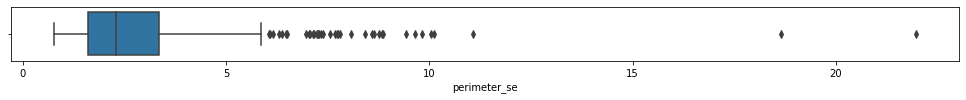

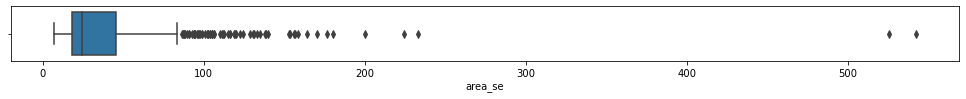

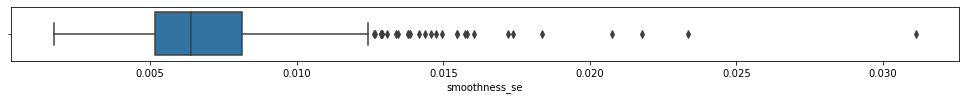

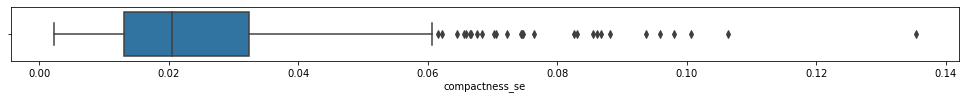

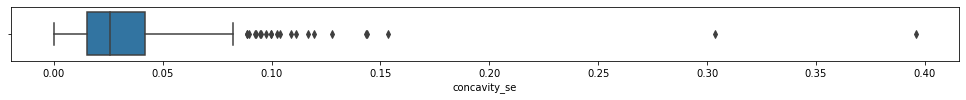

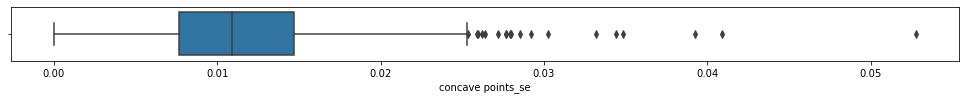

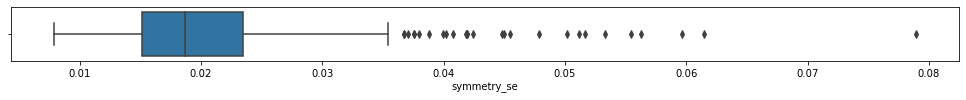

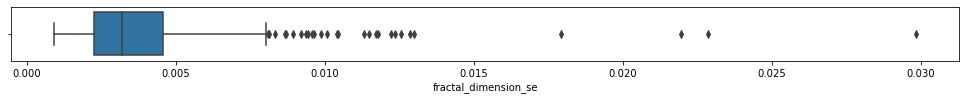

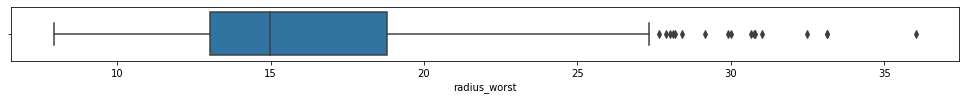

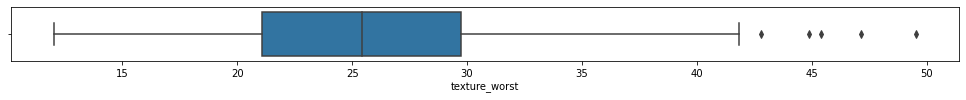

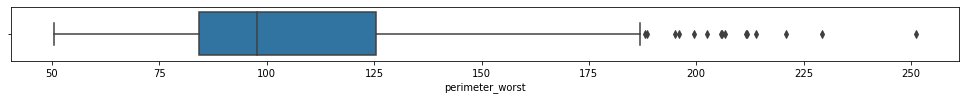

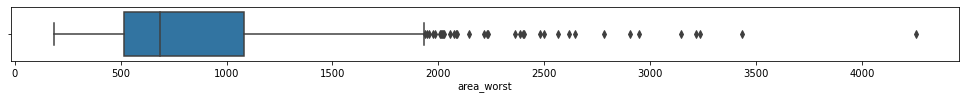

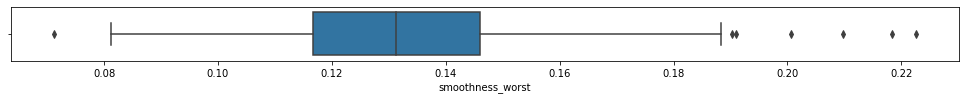

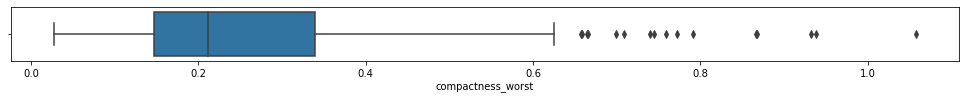

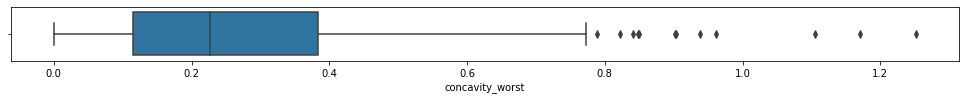

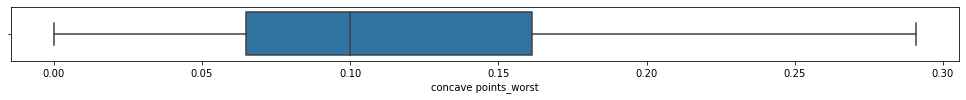

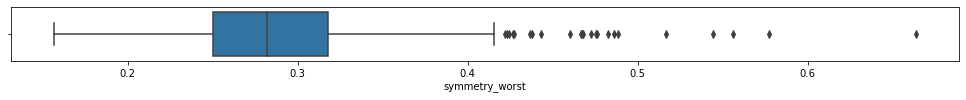

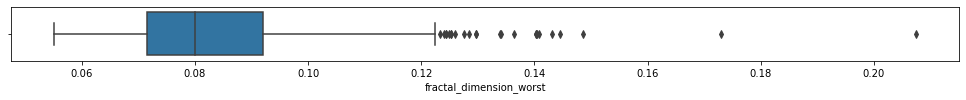

In [17]:
import matplotlib.pyplot as plt

for column in cancer1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer1, x=column)

### Finding the Outliers

In [18]:
a=cancer.select_dtypes(include=['float64'])
for i in a.columns:
    High=cancer[i].mean() + 3*cancer[i].std()
    Low=cancer[i].mean() - 3*cancer[i].std()
    cancer[i] = np.where(cancer[i]>High,High,
    np.where(cancer[i]<Low,Low,cancer[i]
            ))

In [19]:
#cancer['radius_mean'].describe()

In [20]:
#cancer[(cancer['radius_mean'] > 24.699438218530798) | (cancer['radius_mean'] < 3.5551452612583283)]

In [21]:
#cancer_n = cancer[(cancer['radius_mean'] < 3.5551452612583283) & (cancer['radius_mean'] > 24.699438218530798)]
#cancer_n

In [22]:
#print("Highest allowed",cancer['radius_mean'].mean() + 3*cancer['radius_mean'].std())
#print("Lowest allowed",cancer['radius_mean'].mean() - 3*cancer['radius_mean'].std())

In [23]:
#upper_limit = cancer['radius_mean'].mean() + 3*cancer['radius_mean'].std()
#lower_limit = cancer['radius_mean'].mean() - 3*cancer['radius_mean'].std()

In [24]:
#cancer.column_name.loc[df.column_name > max_value]  = max_value

In [25]:
#cancer['area_se'] = np.where(
    #cancer['area_se']>upper_limit,
    #upper_limit,
    #np.where(
        #cancer['area_se']<lower_limit,
        #lower_limit,
        #cancer['area_se']
    #)
#)

### Checking the Target Variable

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

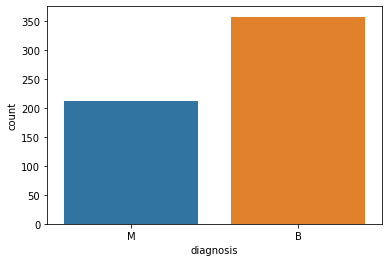

In [26]:
sns.countplot(data=cancer, x='diagnosis')

In [27]:
cancer["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [28]:
357/569

0.6274165202108963

## Co-relation Matrix

In [29]:
corr=cancer.corr()
corr
corr.to_csv("Corr.csv")

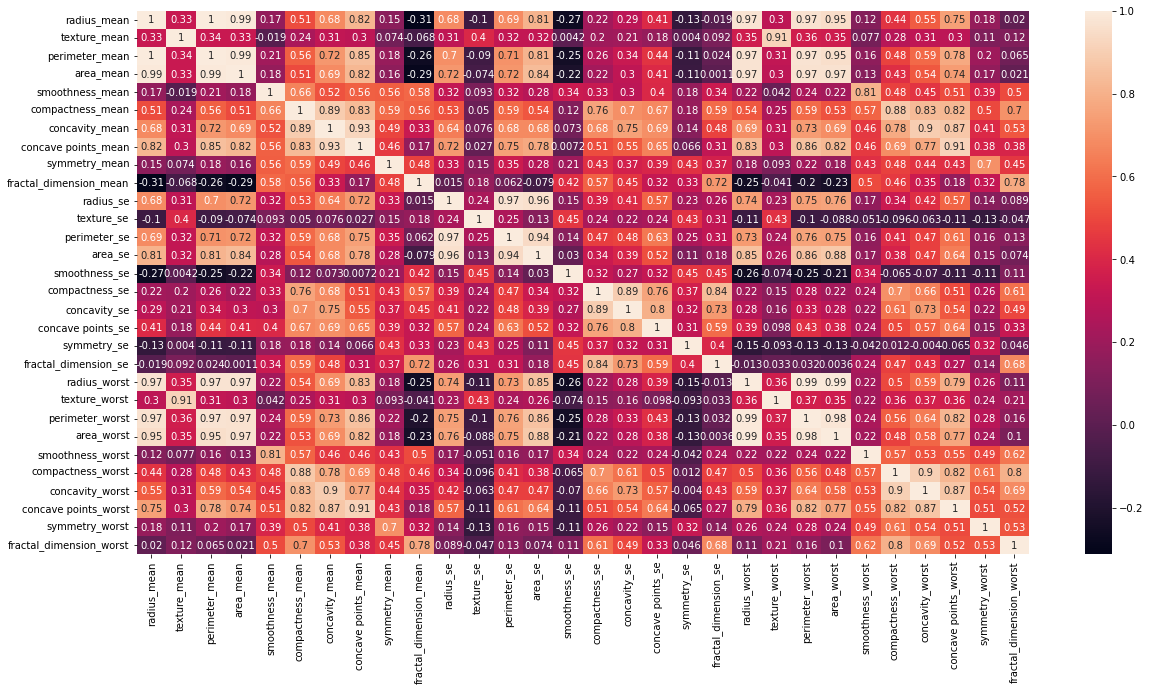

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(cancer.corr(),annot=True)
plt.show()

In [31]:
cancer.drop(columns=["radius_mean","area_mean","concave points_mean","area_se","radius_worst","perimeter_worst"],inplace=True)

In [32]:
cancer["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [33]:
#sns.pairplot(cancer)

In [34]:
cancer.columns

Index(['diagnosis', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [35]:
#area_worst
#concave points_worst


## VIF Check

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [37]:
vif

,variables,VIF
0,texture_mean,13.733262
1,perimeter_mean,28.213544
2,smoothness_mean,7.942343
3,compactness_mean,30.645178
4,concavity_mean,26.531572
5,symmetry_mean,4.284081
6,fractal_dimension_mean,12.702473
7,radius_se,24.913101
8,texture_se,5.426435
9,perimeter_se,23.835650


In [38]:
cancer.drop(columns=["compactness_worst","concavity_worst"],inplace=True)

### After dropping compactness_worst, concavity_worst

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif1 = pd.DataFrame()
vif1["variables"] = X.columns
vif1["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [40]:
vif1

,variables,VIF
0,texture_mean,13.471180
1,perimeter_mean,27.647770
2,smoothness_mean,7.904634
3,compactness_mean,20.751441
4,concavity_mean,17.305456
5,symmetry_mean,4.135464
6,fractal_dimension_mean,10.172062
7,radius_se,24.184546
8,texture_se,5.302224
9,perimeter_se,22.895107


In [41]:
cancer.drop(columns=["area_worst","perimeter_mean"],inplace=True)

### After dropping area_worst,perimeter_mean

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif2 = pd.DataFrame()
vif2["variables"] = X.columns
vif2["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [43]:
vif2

,variables,VIF
0,texture_mean,13.024103
1,smoothness_mean,7.799891
2,compactness_mean,17.887144
3,concavity_mean,16.704354
4,symmetry_mean,4.078472
5,fractal_dimension_mean,7.898961
6,radius_se,20.531508
7,texture_se,5.124557
8,perimeter_se,22.686383
9,smoothness_se,4.834244


In [44]:
cancer.drop(columns=["perimeter_se","radius_se"],inplace=True)

### After dropping perimeter_se,radius_se

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif3 = pd.DataFrame()
vif3["variables"] = X.columns
vif3["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [46]:
vif3

,variables,VIF
0,texture_mean,12.894005
1,smoothness_mean,7.748006
2,compactness_mean,17.295152
3,concavity_mean,15.661870
4,symmetry_mean,4.034181
5,fractal_dimension_mean,7.721875
6,texture_se,5.053514
7,smoothness_se,4.832006
8,compactness_se,13.739799
9,concavity_se,10.825400


In [47]:
cancer.drop(columns=["compactness_mean","concave points_worst"],inplace=True)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif4 = pd.DataFrame()
vif4["variables"] = X.columns
vif4["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [49]:
vif4

,variables,VIF
0,texture_mean,12.524032
1,smoothness_mean,7.182078
2,concavity_mean,5.012822
3,symmetry_mean,3.933719
4,fractal_dimension_mean,6.316693
5,texture_se,4.916461
6,smoothness_se,4.437367
7,compactness_se,9.125983
8,concavity_se,7.787730
9,concave points_se,3.890809


In [50]:
cancer.drop(columns=["texture_worst"],inplace=True)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif5 = pd.DataFrame()
vif5["variables"] = X.columns
vif5["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [52]:
vif5

,variables,VIF
0,texture_mean,1.756749
1,smoothness_mean,6.873628
2,concavity_mean,5.012366
3,symmetry_mean,3.676644
4,fractal_dimension_mean,6.307114
5,texture_se,2.145227
6,smoothness_se,4.101782
7,compactness_se,9.118521
8,concavity_se,7.765639
9,concave points_se,3.870487


In [53]:
cancer.drop(columns=["fractal_dimension_worst","smoothness_worst"],inplace=True)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif6 = pd.DataFrame()
vif6["variables"] = X.columns
vif6["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [55]:
vif6

,variables,VIF
0,texture_mean,1.707339
1,smoothness_mean,3.058690
2,concavity_mean,4.765686
3,symmetry_mean,2.996566
4,fractal_dimension_mean,3.787656
5,texture_se,2.121956
6,smoothness_se,2.028877
7,compactness_se,8.988171
8,concavity_se,7.547739
9,concave points_se,3.824283


In [57]:
cancer.drop(columns=["compactness_se","concavity_se"],inplace=True)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
 
# Get variables for which to compute VIF and add intercept term
X= cancer.drop(["diagnosis"],axis=1)
X['Intercept'] = 1
# Compute and view VIF
vif7 = pd.DataFrame()
vif7["variables"] = X.columns
vif7["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [61]:
vif7

,variables,VIF
0,texture_mean,1.685432
1,smoothness_mean,2.640610
2,concavity_mean,3.405762
3,symmetry_mean,2.966678
4,fractal_dimension_mean,3.690848
5,texture_se,2.114993
6,smoothness_se,2.022090
7,concave points_se,2.818765
8,symmetry_se,2.127502
9,fractal_dimension_se,3.937840


In [62]:
cancer["diagnosis"]=np.where(cancer["diagnosis"]=="B",1,0)

## Train Test Split

In [63]:
y=cancer["diagnosis"]
X=cancer.drop(["diagnosis"],axis=1)

In [64]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2, random_state=88)

In [65]:
scale=MinMaxScaler()
X_train_scaled=scale.fit_transform(X_train)

X_test_scaled=scale.transform(X_test)

#scale=StandardScaler()
#sc_fit=sc.fit(X_train)

In [66]:
#X_test_scaled.head()

In [67]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [68]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [69]:
X_train_scaled

,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst
0,0.408313,0.613050,0.261618,0.473938,0.318354,0.386461,0.207375,0.451051,0.140632,0.144783,0.344949
1,0.491488,0.377818,0.200452,0.335441,0.520302,0.409571,0.302805,0.538820,0.289326,0.656947,0.281974
2,0.518620,0.252914,0.186792,0.330359,0.328643,0.572140,0.249897,0.442472,0.502090,0.630744,0.289180
3,0.335813,0.434938,0.086993,0.499985,0.300717,0.309958,0.208945,0.178111,0.183879,0.200788,0.380352
4,0.418098,0.402586,0.048268,0.556527,0.332758,0.425509,0.253857,0.252021,0.416664,0.070694,0.602172
...,...,...,...,...,...,...,...,...,...,...,...
450,0.539525,0.231583,0.336323,0.451067,0.101121,0.375702,0.213952,0.476458,0.360871,0.382089,0.251897
451,0.442117,0.286807,0.915664,0.409136,0.815140,0.449417,0.196614,0.756261,0.474594,1.000000,0.260983
452,0.406089,0.504737,0.081962,0.444078,0.348926,0.367733,0.219781,0.329858,0.299204,0.114243,0.369386
453,0.545307,0.564463,0.486037,0.560974,0.333934,0.625135,0.404064,0.605141,0.425741,0.334019,0.451786


In [70]:
X_test_scaled

,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst
0,0.152561,0.845320,0.362241,0.633399,1.000000,0.409571,1.000000,0.478437,0.492213,0.976646,0.401970
1,0.502163,0.684153,0.459814,0.423748,0.316003,0.704029,0.283077,0.575445,0.277847,0.261867,0.331477
2,0.265092,0.429012,0.033632,0.648646,0.386846,0.417142,0.831967,0.312535,0.269572,0.310583,0.399777
3,0.339816,0.477481,0.465607,0.324641,0.141687,0.117703,0.264843,0.406507,0.130221,0.075307,0.352155
4,0.119202,0.576314,0.121570,0.571139,0.281904,0.120931,0.401897,0.409476,0.303208,0.124853,0.395391
...,...,...,...,...,...,...,...,...,...,...,...
109,0.376288,0.137372,0.075467,0.365300,0.173434,0.122286,0.037514,0.172996,0.084038,0.098004,0.335549
110,0.266871,0.632011,0.139286,0.576222,0.533530,0.153644,0.106864,0.214142,0.237537,0.141184,0.507241
111,0.266426,0.872576,0.481158,0.652458,0.769283,0.210424,0.361917,0.375161,0.367544,0.386333,0.758198
112,0.636488,0.421546,0.094585,0.397066,0.255742,0.298402,0.164480,0.283961,0.346188,0.184364,0.299833


## Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
log=LogisticRegression()

In [73]:
model1=log.fit(X_train_scaled,y_train)

In [74]:
model1

LogisticRegression()

In [75]:
print("accuracy of train",model1.score(X_train_scaled,y_train))
print("accuracy of test",model1.score(X_test_scaled,y_test))

accuracy of train 0.9406593406593406
accuracy of test 0.9736842105263158


In [76]:
pred_train=model1.predict(X_train_scaled)

In [77]:
pred_test=model1.predict(X_test_scaled)

In [78]:
pred_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,

In [79]:
pred_test

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0])

In [80]:
metrics.confusion_matrix(y_train,pred_train)

array([[150,  23],
       [  4, 278]], dtype=int64)

In [81]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       173
           1       0.92      0.99      0.95       282

    accuracy                           0.94       455
   macro avg       0.95      0.93      0.94       455
weighted avg       0.94      0.94      0.94       455



In [82]:
metrics.confusion_matrix(y_test, pred_test)
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [83]:
from sklearn.metrics import accuracy_score

In [84]:
LR_Score = accuracy_score(y_test,pred_test)

In [85]:
LR_Score

0.9736842105263158

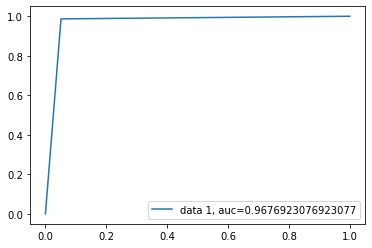

In [86]:
y_pred_proba = model1.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,pred_test)
auc = metrics.roc_auc_score(y_test,pred_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



In [87]:
pip install plot-metric

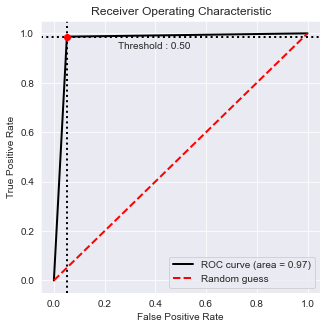

In [88]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test,pred_test, labels=["B", "M"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

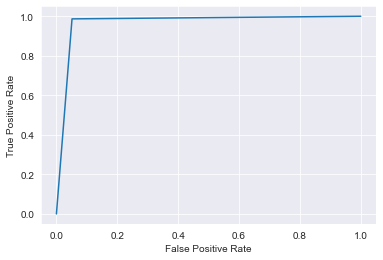

In [89]:
y_pred_proba = model1.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt1=DecisionTreeClassifier()
dt1.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [92]:
print("Train score:",dt1.score(X_train_scaled,y_train))

Train score: 1.0


In [93]:
print("Test score:",dt1.score(X_test_scaled,y_test))

Test score: 0.9473684210526315


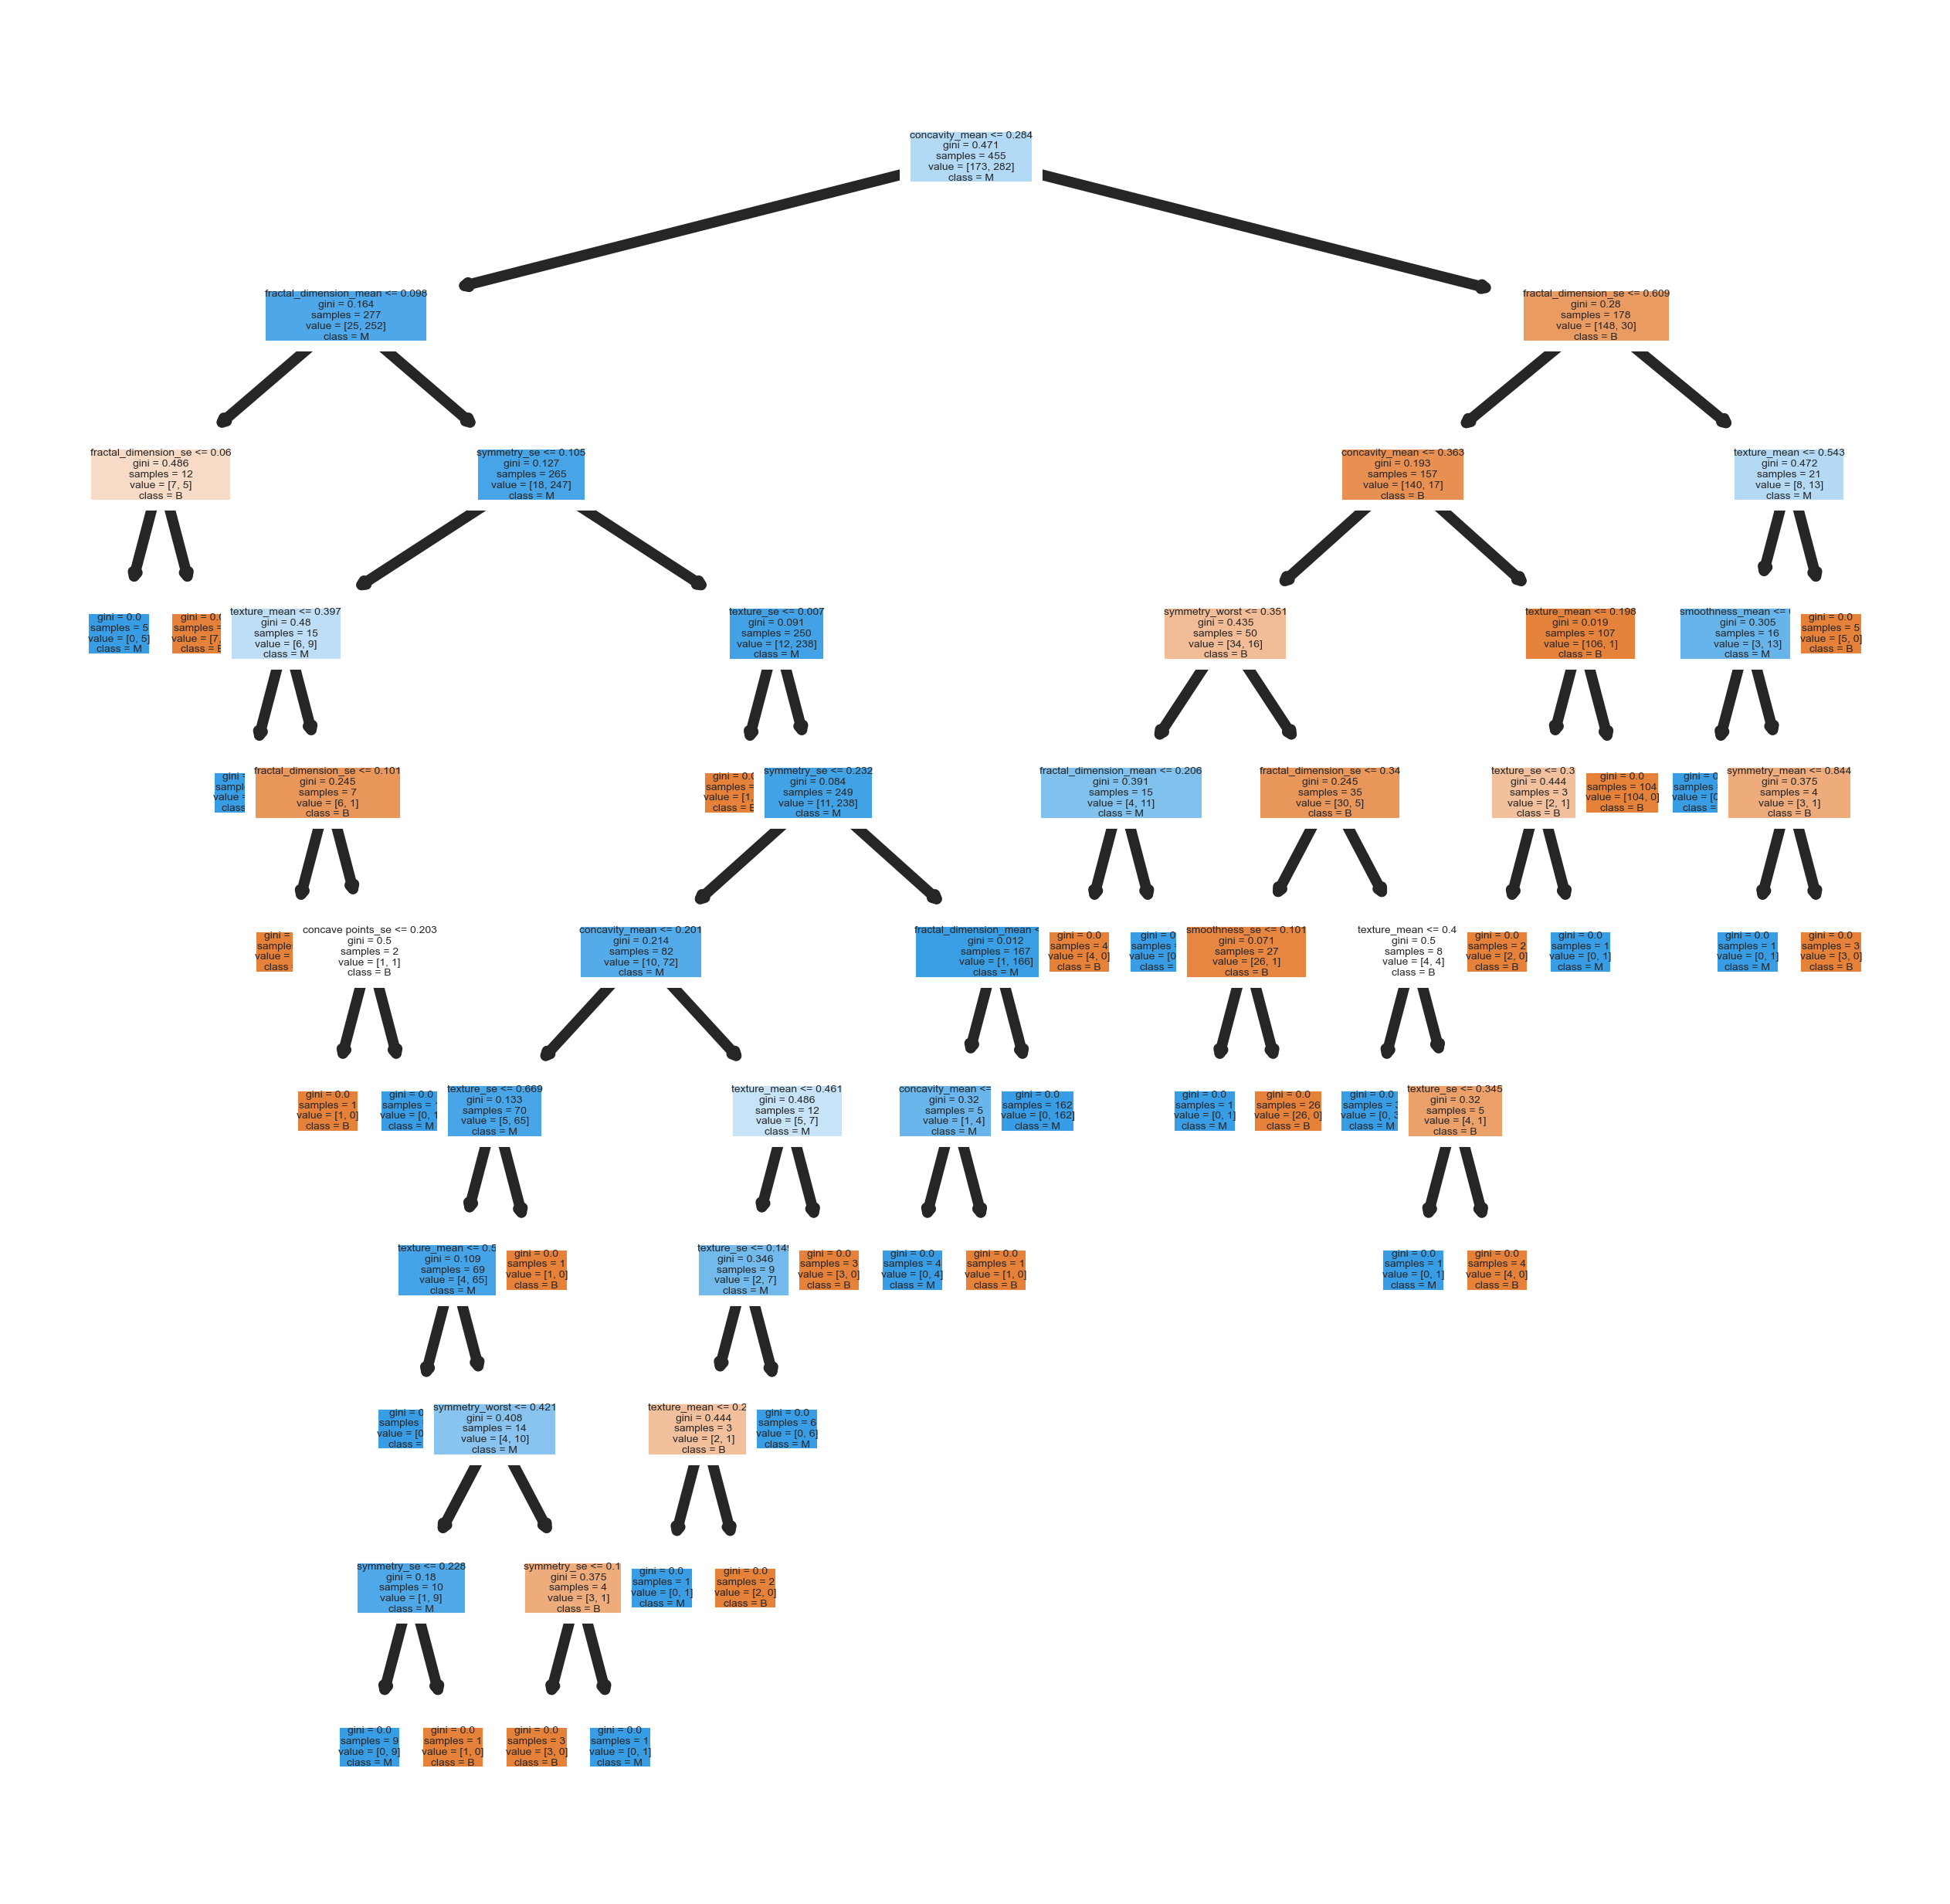

In [94]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train_scaled.columns
cn=["B","M"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)

plot_tree(dt1,
           feature_names = fn, 
           class_names=cn,
           filled = True);

#Some tree squares are hidden, this means that either the min sample split is less than that specified in the criterion or max split leaf
#concavity_mean variable comes on top so it is the most important variable

In [95]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ('gini','entropy'),
              'min_samples_split':[2,3,4,5],
              'max_depth': [2,4,6,8,9,10,11,12],
              'min_samples_leaf':[2,5,10]}

tr = DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=2)

gsearch.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [96]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [97]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=2,min_samples_split=3)
                          
dt2.fit(X_train_scaled,y_train)
print("Train score:",dt2.score(X_train_scaled,y_train))
print("Test score:",dt2.score(X_test_scaled,y_test))

Train score: 0.9868131868131869
Test score: 0.9385964912280702


In [98]:
dt3=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=3,min_samples_split=3)
                          
dt3.fit(X_train_scaled,y_train)
print("Train score:",dt2.score(X_train_scaled,y_train))
print("Test score:",dt2.score(X_test_scaled,y_test))

Train score: 0.9868131868131869
Test score: 0.9385964912280702


In [99]:
pred_train=dt3.predict(X_train_scaled)

In [100]:
pred_test=dt3.predict(X_test_scaled)

In [101]:
metrics.confusion_matrix(y_train,pred_train)

array([[170,   3],
       [  5, 277]], dtype=int64)

In [102]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       173
           1       0.99      0.98      0.99       282

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [103]:
metrics.confusion_matrix(y_test,pred_test)

array([[35,  4],
       [ 1, 74]], dtype=int64)

In [104]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        39
           1       0.95      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [105]:
DT_Score = accuracy_score(y_test,pred_test)

In [106]:
DT_Score

0.956140350877193

## Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf1=RandomForestClassifier()
rf1.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [109]:
print("Train R2",rf1.score(X_train_scaled,y_train))
print("Test R2",rf1.score(X_test_scaled,y_test))

Train R2 1.0
Test R2 0.9473684210526315


In [110]:
parameters={"n_estimators":[50,100,150,200],
            "criterion":["entropy","gini"],
            "max_depth":[3,5,7,9],
#              "min_samples_split":[2,4,6,10],
#              "min_samples_leaf":[2,4,6,10],
            "bootstrap":[True,False],
            "max_features":["log","sqrt"]
           }

rf=RandomForestClassifier()
rf_gs=GridSearchCV(estimator=rf, param_grid=parameters, scoring="accuracy", verbose=1, n_jobs=2, cv=10)
rf_gs.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


C:\Users\22000370\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
640 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\22000370\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\22000370\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\22000370\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\22000370\Anaconda3\l

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['log', 'sqrt'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [111]:
rf_gs.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 150}

In [112]:
rf3=RandomForestClassifier(criterion="entropy", max_depth=9, max_features="sqrt", n_estimators=150, bootstrap=False, random_state=88)   
rf3.fit(X_train_scaled, y_train)
print("Train R2 :",rf3.score(X_train_scaled, y_train))
print("Test R2 :",rf3.score(X_test_scaled, y_test))

Train R2 : 1.0
Test R2 : 0.9736842105263158


In [113]:
pred_train=rf3.predict(X_train_scaled)
pred_test=rf3.predict(X_test_scaled)

In [114]:
metrics.confusion_matrix(y_train,pred_train)

array([[173,   0],
       [  0, 282]], dtype=int64)

In [115]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       282

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [116]:
metrics.confusion_matrix(y_test,pred_test)

array([[38,  1],
       [ 2, 73]], dtype=int64)

In [117]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.99      0.97      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [118]:
RF_Score = accuracy_score(y_test,pred_test)

In [119]:
imp1=pd.DataFrame({"columns": X_train_scaled.columns, "importance":rf3.feature_importances_}).sort_values(by="importance", ascending=False)
imp1

,columns,importance
2,concavity_mean,0.353999
0,texture_mean,0.124876
7,concave points_se,0.087855
4,fractal_dimension_mean,0.079318
1,smoothness_mean,0.076449
10,symmetry_worst,0.073336
9,fractal_dimension_se,0.054540
8,symmetry_se,0.045891
3,symmetry_mean,0.039875
6,smoothness_se,0.035440


In [120]:
imp1.to_csv("imp.csv")

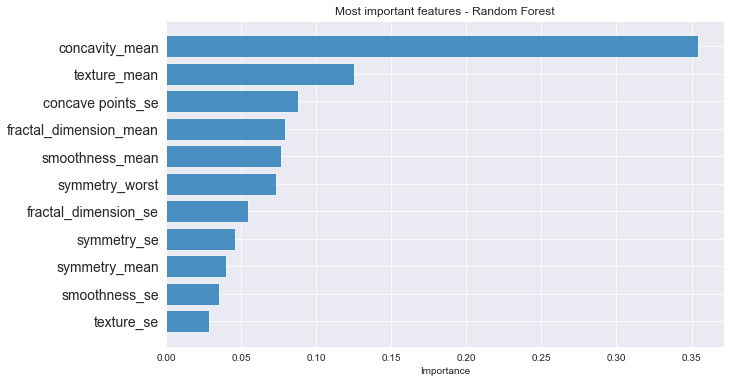

In [121]:
feature_names = X_train_scaled.columns
feature_imports = rf3.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(13, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

## Keeping 11 features

In [124]:
X_train1=X_train_scaled[["concavity_mean","smoothness_se","texture_mean","fractal_dimension_mean","symmetry_worst","concave points_se","smoothness_mean","symmetry_se","symmetry_mean","fractal_dimension_se","texture_se"]]
X_test1=X_test_scaled[["concavity_mean","smoothness_se","texture_mean","fractal_dimension_mean","symmetry_worst","concave points_se","smoothness_mean","symmetry_se","symmetry_mean","fractal_dimension_se","texture_se"]]

In [125]:
rf5=RandomForestClassifier(criterion="entropy", max_depth=9,  n_estimators=200, random_state=88)   
rf5.fit(X_train1, y_train)
print("Train R2 :",rf5.score(X_train1, y_train))
print("Test R2 :",rf5.score(X_test1, y_test))

Train R2 : 1.0
Test R2 : 0.9473684210526315


## Keeping 8 features

In [126]:
X_train2=X_train_scaled[["concavity_mean","texture_mean","fractal_dimension_mean","symmetry_worst","concave points_se","smoothness_mean","symmetry_se","symmetry_mean","fractal_dimension_se"]]
X_test2=X_test_scaled[["concavity_mean","texture_mean","fractal_dimension_mean","symmetry_worst","concave points_se","smoothness_mean","symmetry_se","symmetry_mean","fractal_dimension_se"]]

In [127]:
rf6=RandomForestClassifier(criterion="entropy", max_depth=9,  n_estimators=200, random_state=88)   
rf6.fit(X_train2, y_train)
print("Train R2 :",rf6.score(X_train2, y_train))
print("Test R2 :",rf6.score(X_test2, y_test))

Train R2 : 1.0
Test R2 : 0.9649122807017544


## AdaBoost

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [130]:
adb=AdaBoostClassifier()

In [131]:
adb.fit(X_train_scaled,y_train)
print("Train score",adb.score(X_train_scaled,y_train))
print("Test score",adb.score(X_test_scaled,y_test))

Train score 0.9912087912087912
Test score 0.9824561403508771


In [132]:
adb1=AdaBoostClassifier(n_estimators=300,learning_rate=.1,random_state=88)

adb1.fit(X_train_scaled,y_train)

print("Train score",adb1.score(X_train_scaled,y_train))
print("Test score",adb1.score(X_test_scaled,y_test))

Train score 0.9846153846153847
Test score 0.9912280701754386


In [133]:
from sklearn.model_selection import GridSearchCV

params={"n_estimators":[50,100,150,200,250,300,350],
            "learning_rate":[1,.1,.01,.001]}

adb2=AdaBoostClassifier()
           
adb_gs=GridSearchCV(adb2,param_grid=params,cv=10,n_jobs=2,verbose=1)
adb_gs.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=2,
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350]},
             verbose=1)

In [134]:
adb_gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [135]:
adb3=AdaBoostClassifier(n_estimators=300,learning_rate=1, random_state=88)   
adb3.fit(X_train_scaled, y_train)
print("Train R2 :",adb3.score(X_train_scaled, y_train))
print("Test R2 :",adb3.score(X_test_scaled, y_test))

Train R2 : 1.0
Test R2 : 0.9824561403508771


In [136]:
pred_train=adb3.predict(X_train_scaled)
pred_test=adb3.predict(X_test_scaled)

In [137]:
metrics.confusion_matrix(y_train,pred_train)

array([[173,   0],
       [  0, 282]], dtype=int64)

In [138]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       282

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [139]:
metrics.confusion_matrix(y_test,pred_test)

array([[38,  1],
       [ 1, 74]], dtype=int64)

In [140]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.99      0.99      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [141]:
ADA_Score = accuracy_score(y_test,pred_test)

## XG Boost

In [142]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [143]:
from xgboost import XGBClassifier

In [144]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled,y_train)
print("Train score",xgb.score(X_train_scaled,y_train))
print("Test score",xgb.score(X_test_scaled,y_test))

C:\Users\22000370\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score 1.0
Test score 0.9736842105263158


In [145]:
params={"n_estimators":[50,100,150,200,250],
        "max_depth":[5,7,9,11,13,15]}
        #"min_child_weight":[],
        #"subsample":[],
        #"col_sample_bytree":[],
        #"reg_alpha":[],
        #"reg_lambda":[]
        
        


xgb1=XGBClassifier()
           
xgb_gs=GridSearchCV(xgb1,param_grid=params,cv=5,n_jobs=2,verbose=1)
xgb_gs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\22000370\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [146]:
xgb_gs.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [147]:
xgb1=XGBClassifier(n_estimators=50,max_depth=5,random_state=88)

xgb1.fit(X_train_scaled,y_train)

print("Train score",xgb1.score(X_train_scaled,y_train))
print("Test score",xgb1.score(X_test_scaled,y_test))

[10:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score 1.0
Test score 0.9824561403508771


In [148]:
pred_train=xgb1.predict(X_train_scaled)
pred_test=xgb1.predict(X_test_scaled)

In [149]:
X_test_scaled

,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst
0,0.152561,0.845320,0.362241,0.633399,1.000000,0.409571,1.000000,0.478437,0.492213,0.976646,0.401970
1,0.502163,0.684153,0.459814,0.423748,0.316003,0.704029,0.283077,0.575445,0.277847,0.261867,0.331477
2,0.265092,0.429012,0.033632,0.648646,0.386846,0.417142,0.831967,0.312535,0.269572,0.310583,0.399777
3,0.339816,0.477481,0.465607,0.324641,0.141687,0.117703,0.264843,0.406507,0.130221,0.075307,0.352155
4,0.119202,0.576314,0.121570,0.571139,0.281904,0.120931,0.401897,0.409476,0.303208,0.124853,0.395391
...,...,...,...,...,...,...,...,...,...,...,...
109,0.376288,0.137372,0.075467,0.365300,0.173434,0.122286,0.037514,0.172996,0.084038,0.098004,0.335549
110,0.266871,0.632011,0.139286,0.576222,0.533530,0.153644,0.106864,0.214142,0.237537,0.141184,0.507241
111,0.266426,0.872576,0.481158,0.652458,0.769283,0.210424,0.361917,0.375161,0.367544,0.386333,0.758198
112,0.636488,0.421546,0.094585,0.397066,0.255742,0.298402,0.164480,0.283961,0.346188,0.184364,0.299833


In [150]:
metrics.confusion_matrix(y_train,pred_train)

array([[173,   0],
       [  0, 282]], dtype=int64)

In [151]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       282

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [152]:
metrics.confusion_matrix(y_test,pred_test)

array([[38,  1],
       [ 1, 74]], dtype=int64)

In [153]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.99      0.99      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [154]:
XG_Score = accuracy_score(y_test,pred_test)

In [155]:
XG_Score

0.9824561403508771

## Results

In [156]:
Results = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest','AdaBoost','XGBoost'],
                        'Accuracy Score' : [DT_Score,RF_Score,XG_Score,ADA_Score,LR_Score]})

In [157]:
Results

,Model,Accuracy Score
0,Logistic Regression,0.956140
1,Decision Tree,0.973684
2,Random Forest,0.982456
3,AdaBoost,0.982456
4,XGBoost,0.973684


In [158]:
Final_Results = Results.sort_values(by = 'Accuracy Score', ascending=False)
Final_Results = Final_Results.set_index('Model')
print(Final_Results)

                     Accuracy Score
Model                              
Random Forest              0.982456
AdaBoost                   0.982456
Decision Tree              0.973684
XGBoost                    0.973684
Logistic Regression        0.956140


In [159]:
#Final_df=pd.concat([X_test,y_test],axis=1)

In [160]:
#Final_df

In [161]:
#y_pred

In [162]:
#X_test